# BPWK1: Machine Learning with Liver Dataset

Importing Modules

In [1]:
#Importing Necessary Modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots to appear inside the notebook
%matplotlib inline 

# Models from Sckit-Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Pre-processing
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import recall_score, f1_score, plot_roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc, accuracy_score


# Introduction: Descriptive Stats and Feature Space

Importing Dataset

In [98]:
#Importing Liver Dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian Liver Patient Dataset (ILPD).csv'

url = url.replace(" ", "%20")

#Setting column names
columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 
           'Sgot', 'TP', 'ALB', 'AG_Ratio', 'Diagnosis']

df_ilpd = pd.read_csv(url, names=columns)
print(df_ilpd.shape) #(583, 11)

# TABLE 1
df_ilpd.head(10) 

(583, 11)


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Diagnosis
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Column Description: 
- Age: Age of the patient
- Gender: Gender of the patient
- TB: Total Bilirubin
- DB: Direct Bilirubin
- Alkphos: Alkaline Phosphotase
- Sgpt: Alamine Aminotransferase
- Sgot: Aspartate Aminotransferase
- TP: Total Protiens
- ALB: Albumin
- AG_Ratio: Albumin and Globulin Ratio
- Diagnosis: Selector field used to split the data into two sets (labeled by the experts) into with and without liver disease

In [99]:
# Descriptive statistics: TABLE 2
df_ilpd.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Diagnosis
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


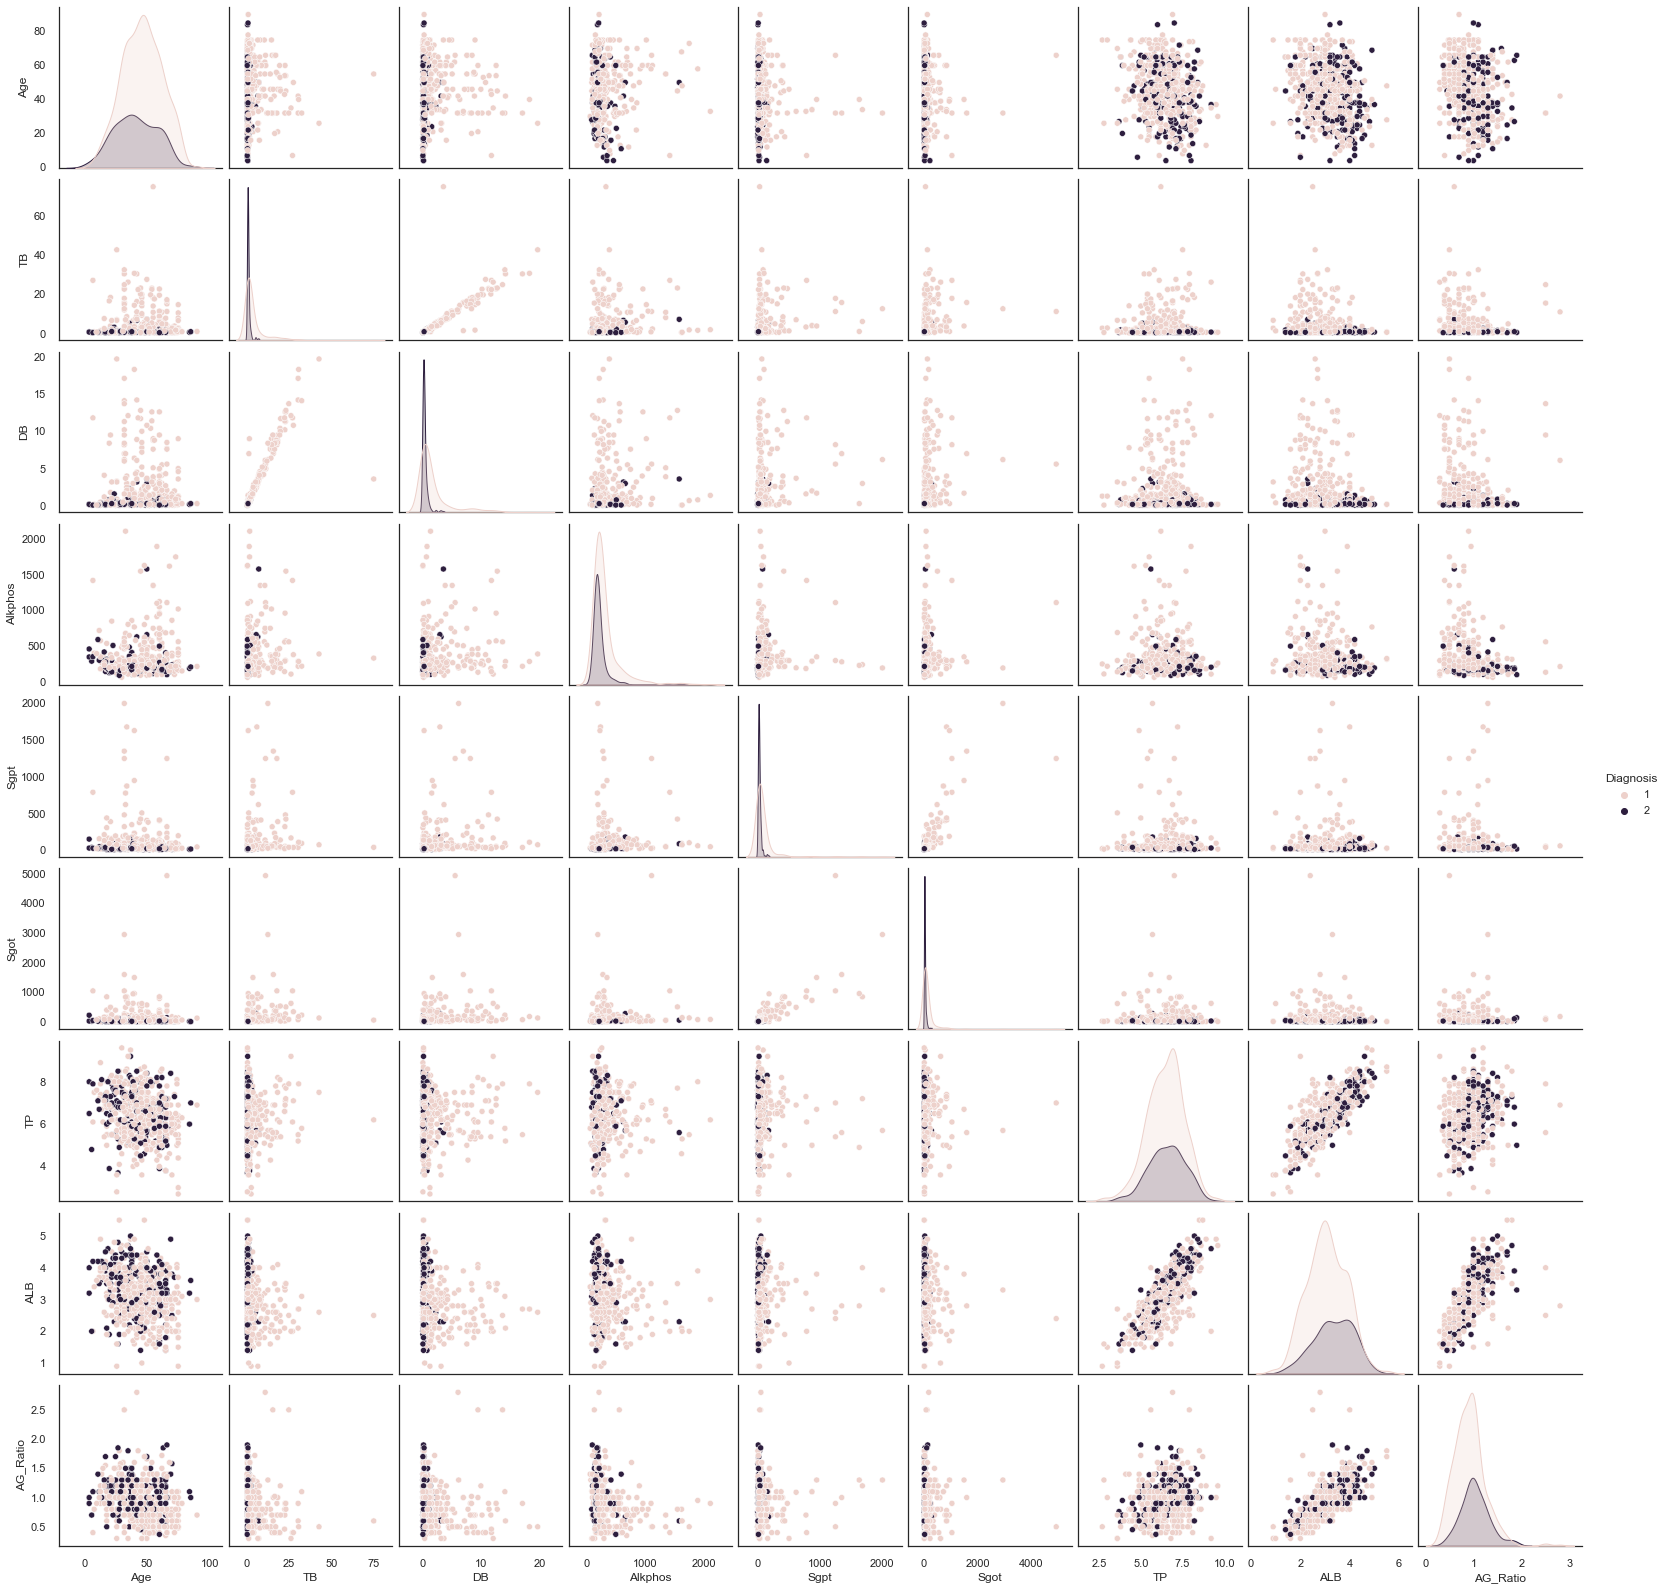

In [81]:
# Feature space: FIGURE 1
plt.rcParams['figure.figsize']=(16,16)
sns.pairplot(df_ilpd,hue='Diagnosis')

# Methodology

Label Encoding

In [100]:
# Transfrom Gender string into float value
df_ilpd['Gender'] = df_ilpd['Gender'].map({'Male':0, 'Female':1})

# Transform Diagnosis to binary 0 or 1 
# 1 = has liver disease, 0 = does not have liver disease
df_ilpd['Diagnosis'] = df_ilpd['Diagnosis'].map({2:0, 1:1})

Missing and Duplicated Data:

In [101]:
df_ilpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    int64  
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   AG_Ratio   579 non-null    float64
 10  Diagnosis  583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


Main takeaways: 
- There are a total of 4 missing values, all values in the AG Ratio columns. 
- Looking at the data types, 'Gender' will need to be converted to a binary data type. 

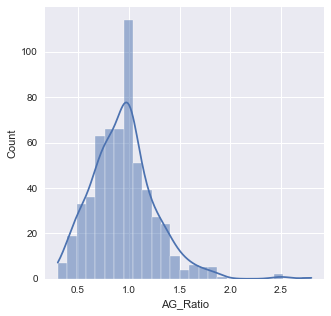

Mean: 0.9470639032815201
Median: 0.93


In [102]:
# Viewing Distribution of AG
# FIGURE 2
plt.figure(figsize=(5, 5))
sns.histplot(x = df_ilpd["AG_Ratio"], palette="winter_r", kde=True)
plt.show()
print("Mean:", df_ilpd["AG_Ratio"].mean())
print("Median:", df_ilpd["AG_Ratio"].median())

'AG Ratio' is right skewed, and therefore the median is a more accurate representation of central tendency. 

In [103]:
# Imputing the data for AG Ratio with the median value
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df_ilpd['AG_Ratio'] = imp.fit_transform(df_ilpd[['AG_Ratio']])
df_ilpd.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
AG_Ratio     0
Diagnosis    0
dtype: int64

In [85]:
# Review for duplicated datarows 
duplicates = df_ilpd.duplicated(subset=None, keep=False)
duplicate_count = duplicates.sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 26


In [86]:
# Visualizing the duplicated data
duplicated_rows = df_ilpd[duplicates]
print(duplicated_rows)

     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  AG_Ratio  Diagnosis
18    40  Female  0.9  0.3      293   232   245  6.8  3.1      0.80          1
19    40  Female  0.9  0.3      293   232   245  6.8  3.1      0.80          1
25    34    Male  4.1  2.0      289   875   731  5.0  2.7      1.10          1
26    34    Male  4.1  2.0      289   875   731  5.0  2.7      1.10          1
33    38  Female  2.6  1.2      410    59    57  5.6  3.0      0.80          2
34    38  Female  2.6  1.2      410    59    57  5.6  3.0      0.80          2
54    42    Male  8.9  4.5      272    31    61  5.8  2.0      0.50          1
55    42    Male  8.9  4.5      272    31    61  5.8  2.0      0.50          1
61    58    Male  1.0  0.5      158    37    43  7.2  3.6      1.00          1
62    58    Male  1.0  0.5      158    37    43  7.2  3.6      1.00          1
105   36    Male  5.3  2.3      145    32    92  5.1  2.6      1.00          2
106   36    Male  5.3  2.3      145    32    92  5.1

In [104]:
# Dropping duplicates
df_ilpd.drop_duplicates(inplace=True)
df_ilpd.shape
# 13 rows dropped

(570, 11)

Exploratory Data Analysis: After imputing missing data, and removing duplicated data rows, there are a total of 570 records to begin the exploratory data analysis. 

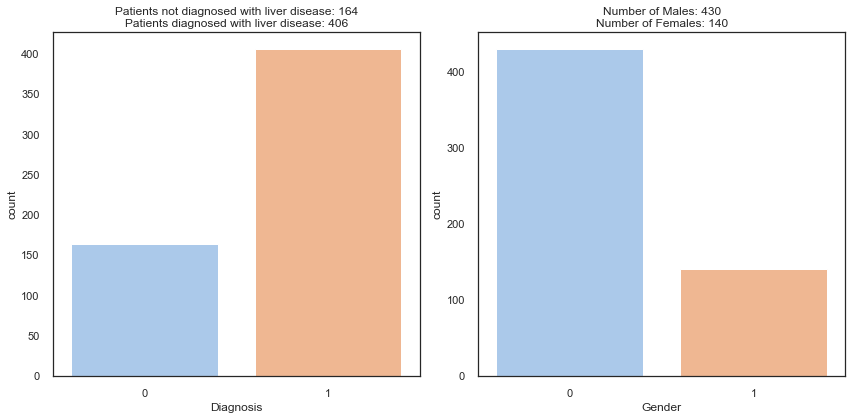

In [105]:
sns.set(style="white")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Diagnosis count plot
sns.countplot(data=df_ilpd, x='Diagnosis', ax=axes[0], palette="pastel")
LD, NLD = df_ilpd['Diagnosis'].value_counts()
axes[0].set_title(f"Patients not diagnosed with liver disease: {NLD}\n"
                  f"Patients diagnosed with liver disease: {LD}")

# Gender count plot
sns.countplot(data=df_ilpd, x='Gender', ax=axes[1], palette="pastel")
M, F = df_ilpd['Gender'].value_counts()
axes[1].set_title(f"Number of Males: {M}\n"
                  f"Number of Females: {F}")

plt.tight_layout()
plt.show()

Visualing histograms of each data: 

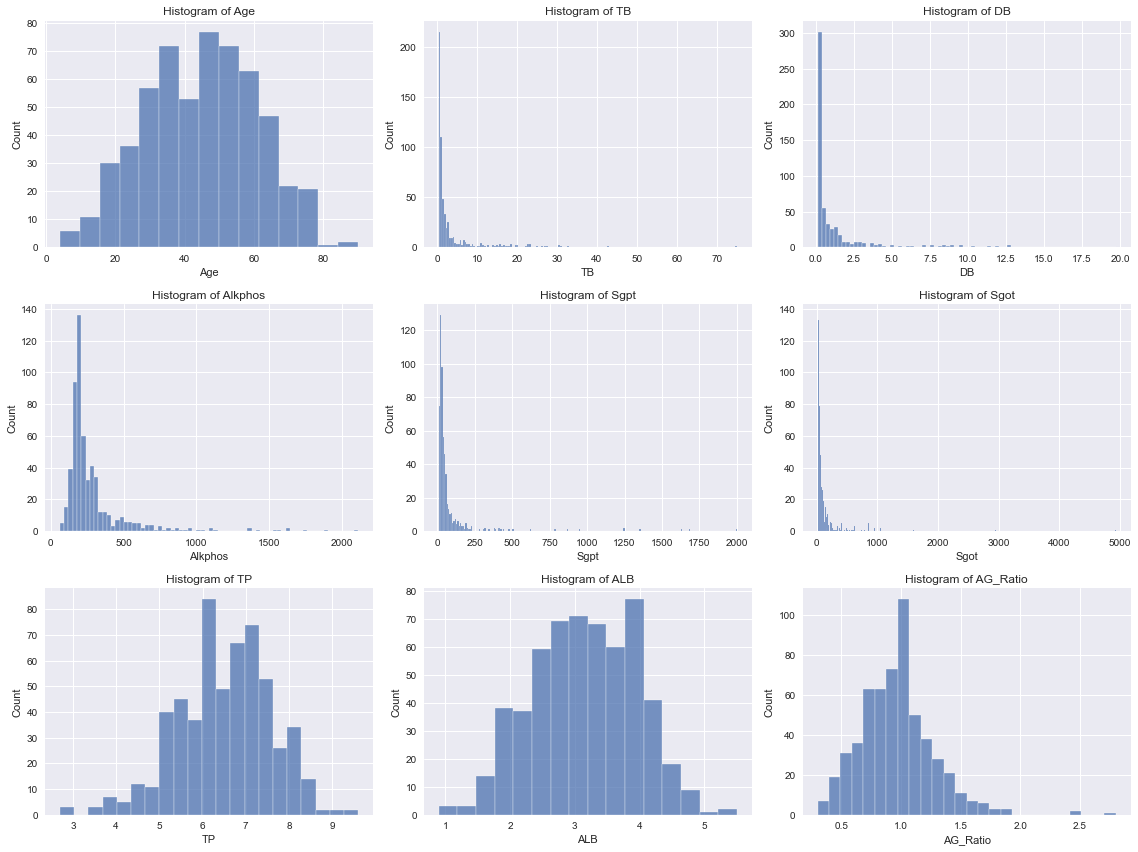

In [106]:
plt.style.use("seaborn")

features = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio']

# Create the figure and axes for subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

# Loop through each feature and create a histgram
for index, feature in enumerate(features):
    row = index // 3
    col = index % 3
    
    sns.histplot(x=df_ilpd[feature], palette="pastel", ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

The histograms show that age, TP, and ALB have mostly normal distributions. AG Ratio is slightly right skewed, as mentioned earlier. TB, DB, Alkphos, Sgpt, and Sgot are highly right skewed and show large outliers. 

Displaying Age, TP, ALB, and AG Ratio in relation to Diagonis to identify possible patterns. 

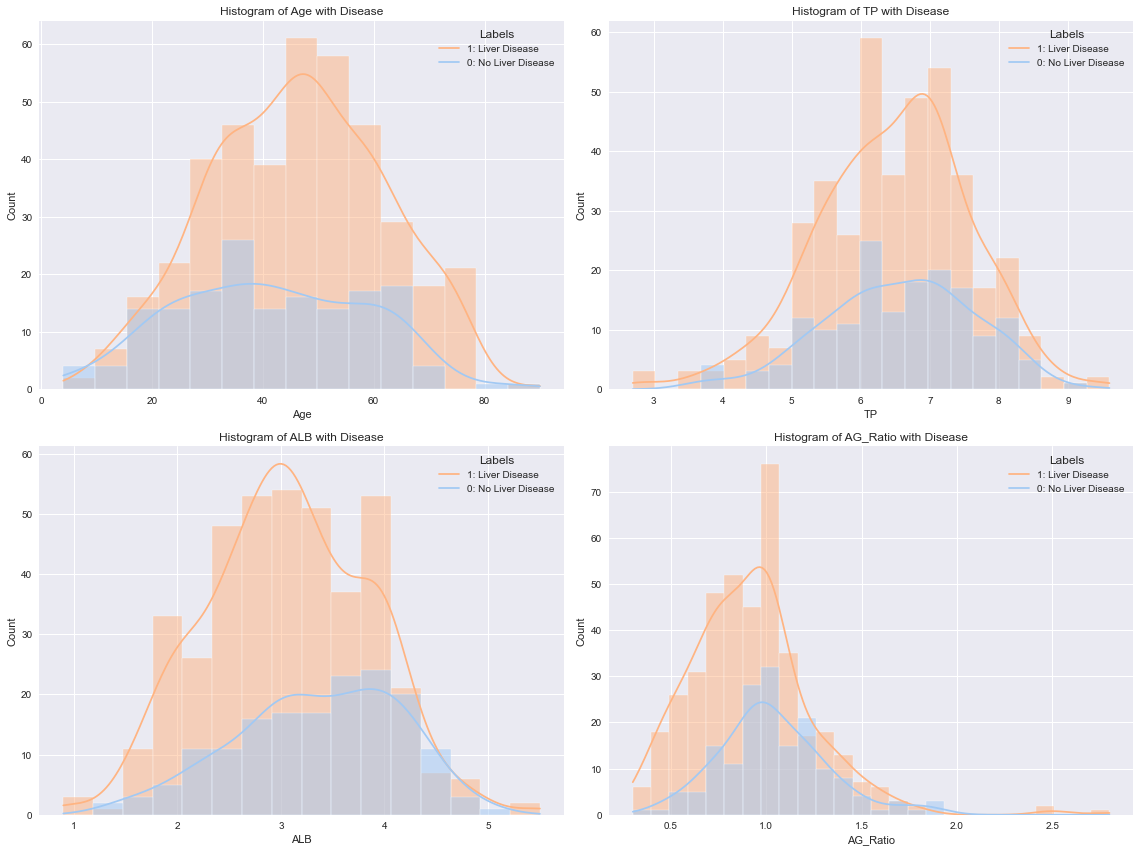

In [107]:
# FIGURE 3 
plt.style.use("seaborn")

# Features with more normal distributions
features = ['Age', 'TP', 'ALB', 'AG_Ratio']

fig, axes = plt.subplots(2,2, figsize=(16, 12))

# Loop through each feature and create a histgram, by Liver Diagnosis
for index, feature in enumerate(features):
    row = index // 2
    col = index % 2
    
    sns.histplot(x=df_ilpd[feature], hue=df_ilpd["Diagnosis"], 
                 palette="pastel", kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {feature} with Disease')
    label=['1: Liver Disease', '0: No Liver Disease']
    axes[row, col].legend(label, title='Labels')


plt.tight_layout()
plt.show()

- Age: In general, there is a increase in individuals with liver disease near 45-55, and 70-75. 
- TP: There appears to be similar peaks in TP for those with and without liver disease. 
- ALB: In general, there are larger spikes for individuals wit liver disease at 2, 3-3.5 and 4. 
- AG_Ratio: Liver disease and those without liver disease have similar distributions. However, there is a larger spike in individuals with liver disease around 1.1. 

Displaying the highly skewed features (TB, DB, Alkphos, Sgpt, and Sgot) in relation to Diagonis to identify possible patterns. 

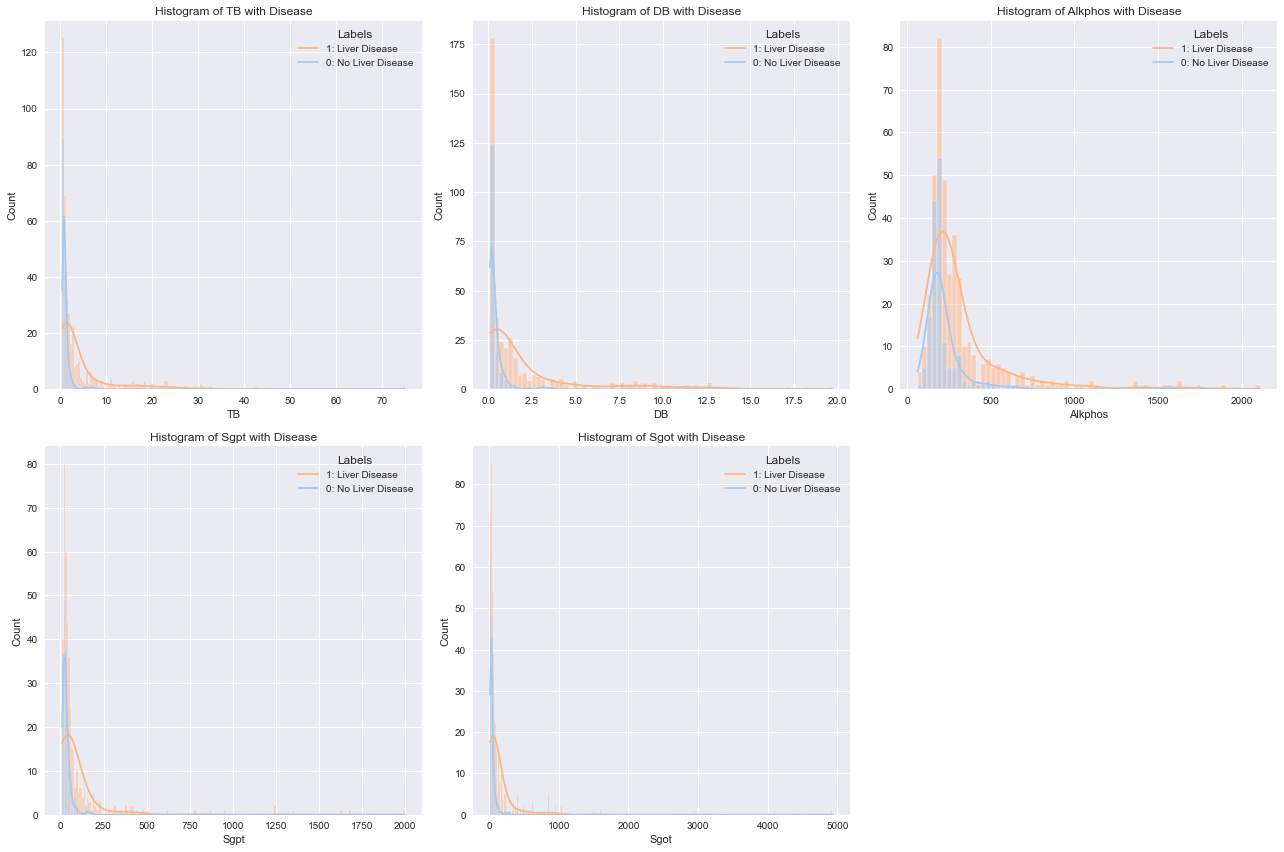

In [15]:
# FIGURE 4
# Features with more skewed distributions
features = ['TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loop through each feature and create a histgram, by Liver Diagnosis
for index, feature in enumerate(features):
    row = index // 3
    col = index % 3
    sns.histplot(x=df_ilpd[feature], hue=df_ilpd["Diagnosis"], palette="pastel", 
                 kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {feature} with Disease')
    label=['1: Liver Disease', '0: No Liver Disease']
    axes[row, col].legend(label, title='Labels')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

Overall, all features show those with liver disease have longer tails, and a larger portion of individuals outside the peaks. This shows it is worth evaluating the kurtosis for outlier insight.

In [108]:
df_ilpd.drop(columns=["Diagnosis", "Gender"]).kurtosis()

Age          -0.565802
TB           36.506452
DB           11.122476
Alkphos      17.355150
Sgpt         52.711534
Sgot        150.307467
TP            0.265701
ALB          -0.373112
AG_Ratio      3.400585
dtype: float64

TB, DB, Alkphos, Sgpt, and Sgot have high kurtosis values. Further analysing the highly skewed data to determine data processing steps: 

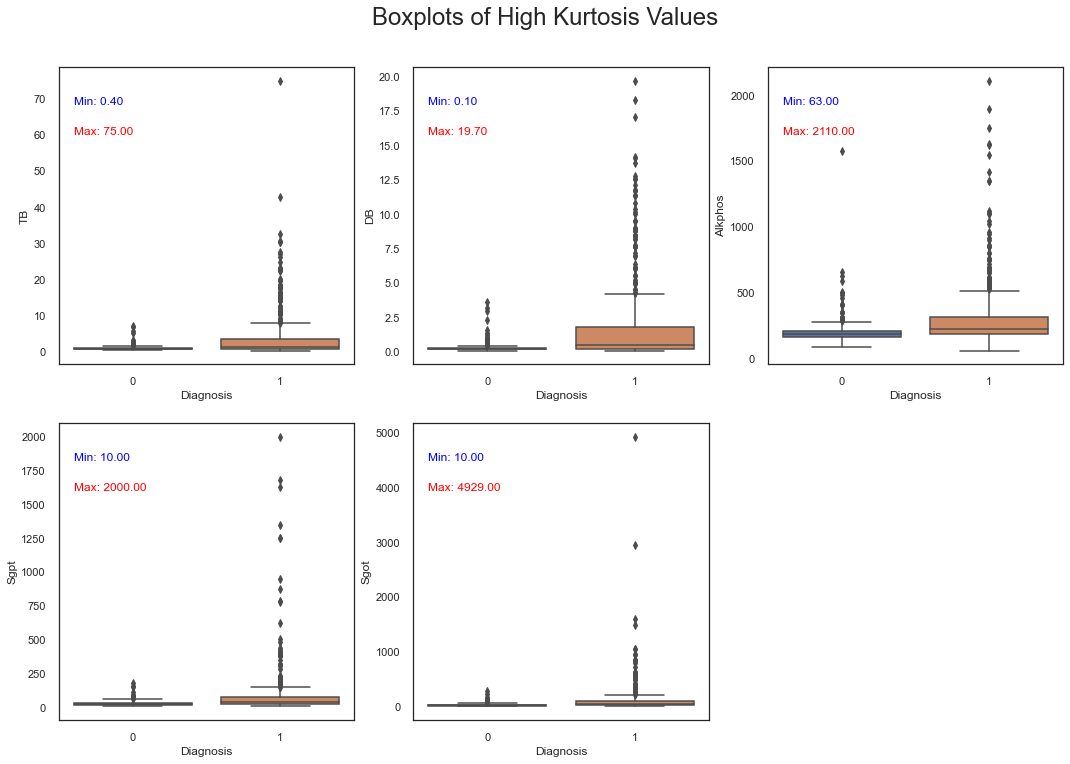

In [109]:
# FIGURE 5
sns.set(style="white")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Highly Right-Skewed Features
y_values = ["TB", "DB", "Alkphos", "Sgpt", "Sgot"]

for idx, y_value in enumerate(y_values):
    row = idx // 3
    col = idx % 3
    sns.boxplot(x="Diagnosis", y=y_value, data=df_ilpd, ax=axes[row, col])
    min_value = df_ilpd[y_value].min()
    max_value = df_ilpd[y_value].max()
    # Highlighting the minimum value
    axes[row, col].text(0.05, 0.9, f"Min: {min_value:.2f}", fontsize=12, verticalalignment='top',
                        color='blue', transform=axes[row, col].transAxes)
    # Highlighting the maximum value
    axes[row, col].text(0.05, 0.8, f"Max: {max_value:.2f}", fontsize=12, verticalalignment='top', 
                        color='red', transform=axes[row, col].transAxes)
    
fig.delaxes(axes[1, 2])

fig.suptitle('Boxplots of High Kurtosis Values', fontsize=24, y=0.95)
plt.show()

TABLE 3

Healthy Ranges for the 5 features with large outliers:
- TB: 0.1 to 1.2 mg/dL (1.71 to 20.5 µmol/L)
- DB: less than 0.3 mg/dL (less than 5.1 µmol/L)
- Alkphos: 40 to 129 U/L
- Sgpt: 7 to 55 units per liter (U/L)
- Sgot: 8 to 48 U/L

sources: https://www.mayoclinic.org/tests-procedures/liver-function-tests/about/pac-20394595, https://www.mountsinai.org/health-library/tests/bilirubin-blood-test#:~:text=Normal%20Results,1.71%20to%2020.5%20%C2%B5mol%2FL)

There are a large number of outliers TB, DB, Alkphos, Sgpt, and Sgot, specifically for the upper end. The lower minimum values are all within measurement ranges, however, it is less clear for the upper outliers. Therefore, the upper outliers will be replaced with the 99th percentiles. 

In [110]:
# Replace outliers with the 99th percentiles 
def replace_outliers(df, columns):
    for col in columns:
        p99 = np.percentile(df[col], 99)
        df.loc[df[col] > p99, col] = p99
    return df

columns_to_process = ['TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot']
df_ilpd = replace_outliers(df_ilpd, columns_to_process)

In [111]:
# Reviewing kurtosis after adjusting 99th percentile outliers
df_ilpd.drop(columns=["Diagnosis", "Gender"]).kurtosis()

Age         -0.565802
TB           9.178502
DB           7.617838
Alkphos     12.935372
Sgpt        28.899093
Sgot        14.959288
TP           0.265701
ALB         -0.373112
AG_Ratio     3.400585
dtype: float64

After replacing the outliers, (values below the 1% percentile and above the 99% percentile), the kurtosis significant changes for those 5 features.  

In [112]:
df_ilpd.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Diagnosis
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,0.245614,3.197558,1.464867,289.592632,74.636842,96.841053,6.496316,3.148947,0.947877,0.712281
std,16.242182,0.430829,5.366024,2.666424,232.099754,140.839535,164.966272,1.088300,0.796813,0.318513,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,28.568000,13.079000,1559.300000,1043.000000,987.900000,9.600000,5.500000,2.800000,1.000000


This also shows the distribution of the data is very wide and gives evidence to use a scaling method for the variables. 

In [113]:
# Scaling: Min-Max to put the features on a 0-1 scale
mms=MinMaxScaler()
scaled=mms.fit_transform(df_ilpd)
liver_scaled = pd.DataFrame(scaled, columns=df_ilpd.columns)
liver_scaled.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Diagnosis
0,0.709302,1.0,0.010650,0.000000,0.082871,0.005808,0.008181,0.594203,0.521739,0.240,1.0
1,0.674419,0.0,0.372763,0.416057,0.425048,0.052275,0.092034,0.695652,0.500000,0.176,1.0
2,0.674419,0.0,0.244959,0.308190,0.285371,0.048403,0.059311,0.623188,0.521739,0.236,1.0
3,0.627907,0.0,0.021301,0.023114,0.079530,0.003872,0.010226,0.594203,0.543478,0.280,1.0
4,0.790698,0.0,0.124254,0.146390,0.088218,0.016457,0.050107,0.666667,0.326087,0.040,1.0


After scaling and handling of outliers, correlation matrix is viewed to see if there is any multicollinearity

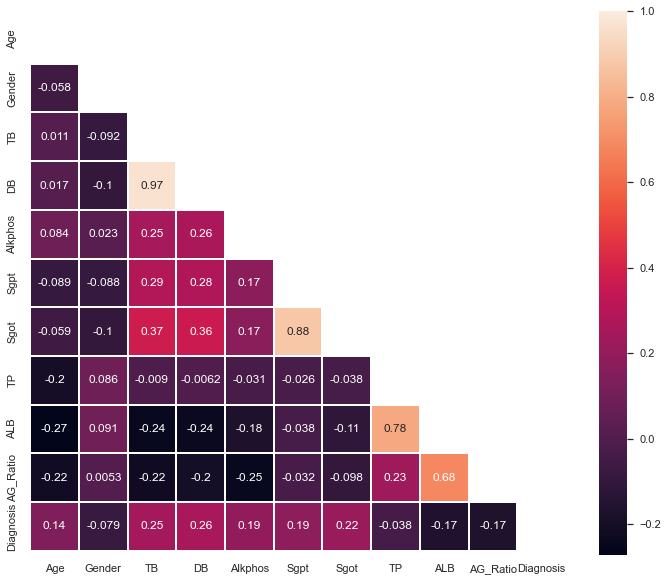

In [114]:
# FIGURE 6
sns.set(style="white")

#correlation-matrix
corr=liver_scaled.corr()
plt.subplots(figsize=(12, 10))
#plt.title('Correlation Matrix')

# Heatmap for matrix
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(liver_scaled.corr(),linewidths=0.25, mask=mask, vmax=1.0, square=True, annot=True)
plt.show()

There are high correlations between: 
- DB & TB (0.97)
    - DB has slightly higher correlation with Diagnosis (0.26 vs. 0.25)
- Sgot & Sgpt (0.88)
    - Sgot and Sgpt have similar correlation with Diagnosis (0.22 vs. 0.19)
- ALB & TP (0.78)
    - ALB has much higher correlation with Diagnosis (0.17, 0.038)
- ALB & AG (0.68)
    - ALB and AG have the same correlation values with Diagnosis (0.17)

Conducting further analysis to consider removing one of the correlated features in the dataset for each of the pairs: 

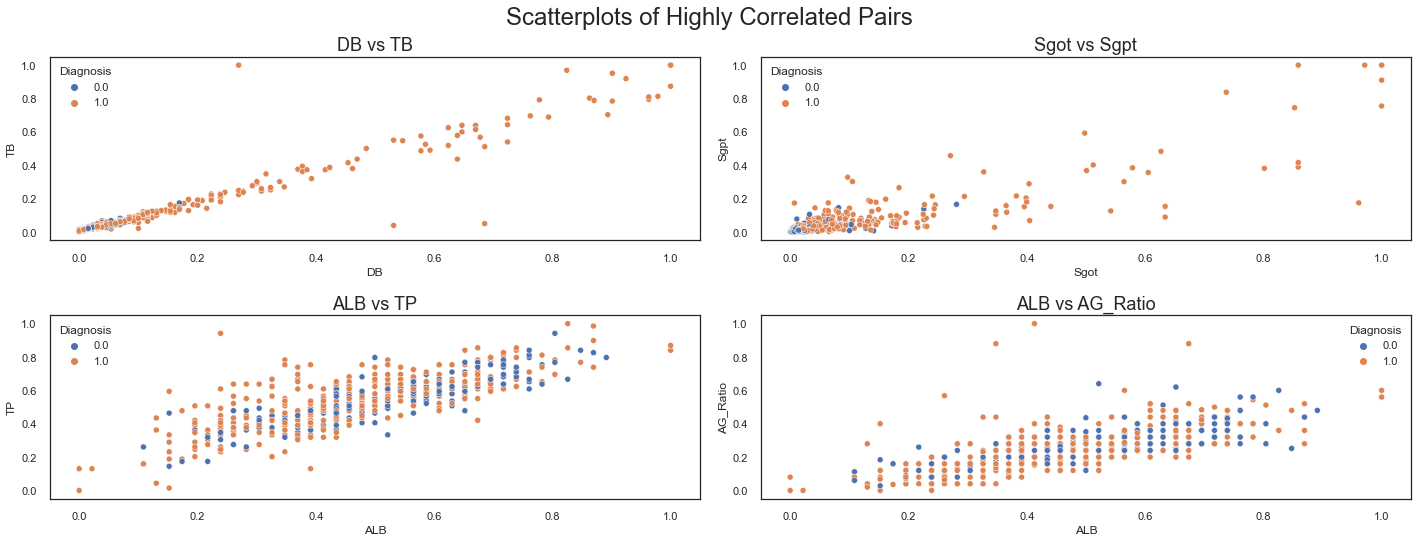

In [115]:
# FIGURE 7
sns.set(style="white")

fig, axs = plt.subplots(2, 2, figsize=(20, 8))

correlated_pairs = [("DB", "TB"), ("Sgot", "Sgpt"), ("ALB", "TP"), ("ALB", "AG_Ratio")]

# Scatterplots of highly correlated features
for idx, (x_value, y_value) in enumerate(correlated_pairs):
    row = idx // 2
    col = idx % 2
    sns.scatterplot(x=x_value, y=y_value, hue="Diagnosis", data=liver_scaled, ax=axs[row, col])
    
    correlation = np.corrcoef(liver_scaled[x_value], liver_scaled[y_value])[0, 1]
    axs[row, col].set_title(f"{x_value} vs {y_value}", fontsize=18)

fig.suptitle('Scatterplots of Highly Correlated Pairs', fontsize=24, y=0.95)
plt.tight_layout(pad=1.5)
plt.show()

There is evidence of a linear trend for DB & TB, ALB & TP, and ALB & AG Ratio. Sgot & Sgpt appear to be more clustered together, but still have similar trends

The linear relationships, and high correlation values between the pairs provide evidence to remove one feature from each pair to reduce collinearity, redundancy, and create a simpler model. 

- DB & TB:  They have similar correlation values to Diagnosis, DB has more consistent outliers, TP is removed
- Sgot & Sgpt: They have similar correlation values to Diagnosis, Sgpt has more consistent outliers, Sgot is removed
- ALB & TP, ALB & AG Ratio: TP and AG Ratio are removed to reduce the number of features

In [116]:
# Creating new data set without highly correlated features
ilpd_data=liver_scaled[['Age', 'Gender', 'Alkphos', 'DB', 'Sgpt','ALB', 'Diagnosis']]
print(ilpd_data.shape)
ilpd_data.head()

(570, 7)


,Age,Gender,Alkphos,DB,Sgpt,ALB,Diagnosis
0,0.709302,1.0,0.082871,0.000000,0.005808,0.521739,1.0
1,0.674419,0.0,0.425048,0.416057,0.052275,0.500000,1.0
2,0.674419,0.0,0.285371,0.308190,0.048403,0.521739,1.0
3,0.627907,0.0,0.079530,0.023114,0.003872,0.543478,1.0
4,0.790698,0.0,0.088218,0.146390,0.016457,0.326087,1.0


In [117]:
# Final Liver Disease counts for ML dataset
diagnosis_counts = ilpd_data['Diagnosis'].value_counts()

num_liver_disease = diagnosis_counts[1]
num_no_liver_disease = diagnosis_counts[0]

print(f"Number of patients diagnosed with liver disease: {num_liver_disease}")
print(f"Number of patients not diagnosed with liver disease: {num_no_liver_disease}")

Number of patients diagnosed with liver disease: 406
Number of patients not diagnosed with liver disease: 164


After data preprocessing, there are 570 rows, 6 features, and 1 predictor: 


In [118]:
# Features
liverX = ilpd_data.drop('Diagnosis', axis='columns').copy()
print(liverX.shape)

# Predictor Variable
liverY = ilpd_data['Diagnosis'].copy()
print(liverY.shape)

liverX.head()

(570, 6)
(570,)


,Age,Gender,Alkphos,DB,Sgpt,ALB
0,0.709302,1.0,0.082871,0.000000,0.005808,0.521739
1,0.674419,0.0,0.425048,0.416057,0.052275,0.500000
2,0.674419,0.0,0.285371,0.308190,0.048403,0.521739
3,0.627907,0.0,0.079530,0.023114,0.003872,0.543478
4,0.790698,0.0,0.088218,0.146390,0.016457,0.326087


Class Imbalance and Splitting the Data: 

The dataset is very imbalance, with 71.23% of the data having liver disease. This imbalance needs to be addressed and given the relatively small dataset, oversampling is the best technique

In [27]:
# Train-Test-Split, stratify needed for class imbalance
X_train, X_test, y_train, y_test = train_test_split(
    liverX, liverY, test_size=0.20, random_state=7, stratify=liverY) 

# Apply oversampling technique to the training data only
ros = RandomOverSampler(random_state=7)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [28]:
# Class Distribution between the train and test data
unique, counts = np.unique(y_train_ros, return_counts=True)
print(f"Class proportion in Train: {'{:02.2f}'.format(100*counts[1]/sum(counts))}% Have Liver Disease, {'{:02.2f}'.format(100*counts[0]/sum(counts))}% Do Not Have Liver Disease")
unique, counts = np.unique(y_test, return_counts=True)
print(f"Class proportion in Test: {'{:02.2f}'.format(100*counts[1]/sum(counts))}% Have Liver Disease, {'{:02.2f}'.format(100*counts[0]/sum(counts))}% Do Not Have Liver Disease")

Class proportion in Train: 50.00% Have Liver Disease, 50.00% Do Not Have Liver Disease
Class proportion in Test: 71.05% Have Liver Disease, 28.95% Do Not Have Liver Disease


# Classification Algorithms Pipeline

Those used in previous literature include: Decision Tree, Neural Networks, Support Vector Machine, and Random Forest. KNN has not been well utlized in literature with this dataset, but was a focus in the course. 

In [31]:
# TABLE 

from sklearn.metrics import accuracy_score
classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=93)),
    ("Decision Tree", DecisionTreeClassifier(random_state=93)),
    ("Support Vector Machine", SVC(random_state=93, probability=True)), 
    ("KNN", KNeighborsClassifier()), 
    ("ANN", MLPClassifier(random_state=93, max_iter = 2000))
]

for name, classifier in classifiers:
    classifier.fit(X_train_ros, y_train_ros)
    y_pred = classifier.predict(X_test)
    
    # Predicted probabilities for AUROC calculation
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_pred_proba)

    # Scoring Metrics to Determine the 2 Algorithms
    print(f"\n{name} Classifier:")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"AUROC: {auroc:.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Random Forest Classifier:
Precision: 0.7323
Recall: 0.7368
F1 Score: 0.7343
AUROC: 0.7860
Accuracy: 0.7368

Decision Tree Classifier:
Precision: 0.6965
Recall: 0.7018
F1 Score: 0.6989
AUROC: 0.6285
Accuracy: 0.7018

Support Vector Machine Classifier:
Precision: 0.7627
Recall: 0.5965
F1 Score: 0.6084
AUROC: 0.7636
Accuracy: 0.5965

KNN Classifier:
Precision: 0.6895
Recall: 0.6053
F1 Score: 0.6236
AUROC: 0.6751
Accuracy: 0.6053

ANN Classifier:
Precision: 0.7661
Recall: 0.6404
F1 Score: 0.6553
AUROC: 0.7643
Accuracy: 0.6404


Based off the initial pipeline of classification algorithms, it seems plausible to investigate Random Forest and KNN. 

# Results: Random Forest and ANN with Grid Search 

Grid search is performed with 10-fold cross validation and F1 as the tuning metric, which is a balance of recall and precision.

Confusion Matrix Function:

In [72]:
def plot_confusion_matrix(y_test, y_pred, classifier_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6)) 
    sns.heatmap(cm, annot=True, fmt="d", cmap="crest")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()

Random Forest Grid Search and Performance: 


Random Forest Classifier:
Best Parameters: {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Tuning Score: 0.8053
AUROC: 0.7838


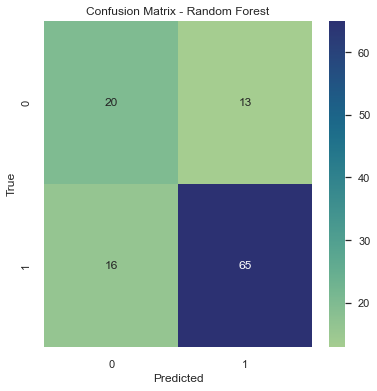


ANN Classifier:
Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 20), 'learning_rate_init': 0.005}
Best Tuning Score: 0.7562
AUROC: 0.8245


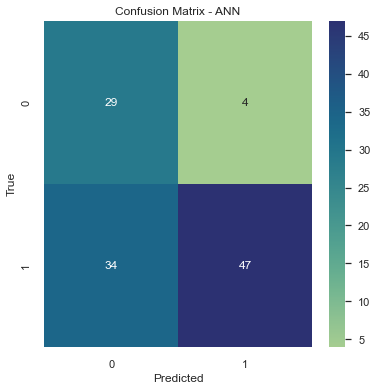

In [76]:
classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=93)), 
    ("ANN", MLPClassifier(random_state=93, max_iter=7000))
]

params = {
     "Random Forest": {
        "n_estimators": [50, 100, 200, 800],
        'min_samples_split' : [2, 4, 5],
        'min_samples_leaf': [2, 4, 5],
        "criterion": ["gini", "entropy"]
    }, 
    "ANN": {
        'hidden_layer_sizes': [(30,10), (50,), (100,), (100, 20)],
        'alpha': [0.0001, 0.001, 0.01],
        'activation': ['relu', 'logistic', 'tanh'],
        'learning_rate_init': [0.01, 0.001, 0.0001, 0.005]}
}


# Initialize a dictionary to hold the best parameters for each classifier
best_params = {}

for name, classifier in classifiers:
    grid_search = GridSearchCV(classifier, params[name], cv=10, scoring="f1")
    grid_search.fit(X_train_ros, y_train_ros)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]  
    auroc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n{name} Classifier:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Tuning Score: {grid_search.best_score_:.4f}")
    print(f"AUROC: {auroc:.4f}")
    plot_confusion_matrix(y_test, y_pred, name)
    
    # Save the best parameters for this classifier
    best_params[name] = grid_search.best_params_

# Random Forest Deep Dive and Sensitvity: 

Default:
Accuracy: 0.7368
Precision: 0.7323
Recall: 0.7368
F1 Score: 0.7343


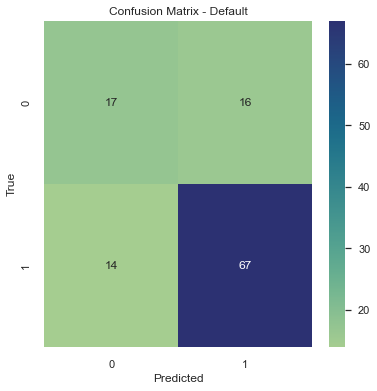

Optimized:
Accuracy: 0.7456
Precision: 0.7529
Recall: 0.7456
F1 Score: 0.7487


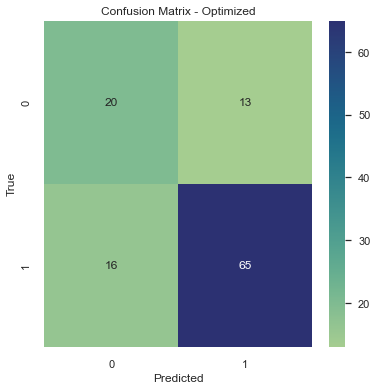

Adjusted n_estimator:
Accuracy: 0.7281
Precision: 0.7257
Recall: 0.7281
F1 Score: 0.7268


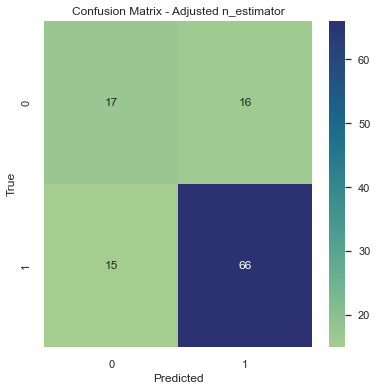

Adjusted min_samples_leaf:
Accuracy: 0.7544
Precision: 0.7756
Recall: 0.7544
F1 Score: 0.7613


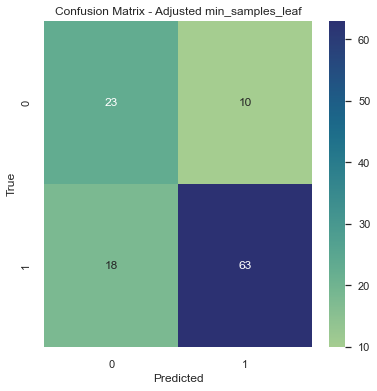

In [41]:
# FIGURES 12 - 15
classifiers = {
    "Default": RandomForestClassifier(random_state=93),
    "Optimized": RandomForestClassifier(random_state=93, **best_params["Random Forest"]),
    "Adjusted n_estimator": RandomForestClassifier(random_state=93, criterion ='entropy', 
                                                   min_samples_leaf=2, min_samples_split=2, n_estimators= 50),
    "Adjusted min_samples_leaf": RandomForestClassifier(random_state=93, criterion ='entropy', 
                                                        min_samples_leaf=4,  min_samples_split=2, n_estimators= 100)
}

for name, classifier in classifiers.items():
    # Fit and predict
    classifier.fit(X_train_ros, y_train_ros)
    y_pred = classifier.predict(X_test)

    # Print metrics
    print(f'{name}:')
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    plot_confusion_matrix(y_test, y_pred, f'{name}')
    plt.show()

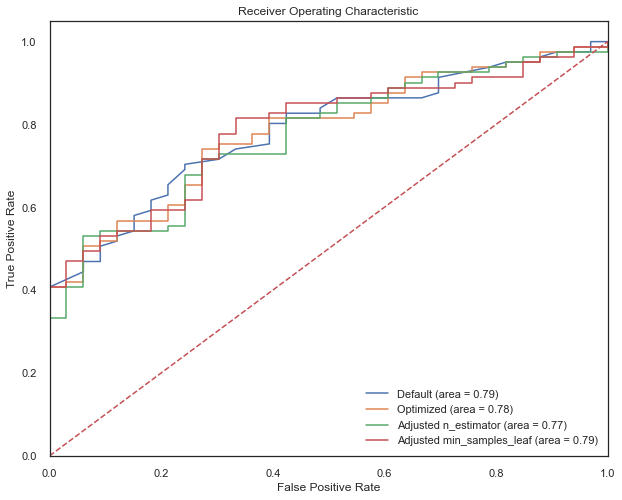

In [54]:
# FIGURE 16
classifiers = {
    "Default": RandomForestClassifier(random_state=93),
    "Optimized": RandomForestClassifier(random_state=93, **best_params["Random Forest"]),
    "Adjusted n_estimator": RandomForestClassifier(random_state=93, criterion ='entropy', min_samples_leaf=2, min_samples_split=2, n_estimators= 50),
    "Adjusted min_samples_leaf": RandomForestClassifier(random_state=93, criterion ='entropy', min_samples_leaf=4,  min_samples_split=2, n_estimators= 100)
}

plt.figure(figsize=(10, 8))

for name, classifier in classifiers.items():
    classifier.fit(X_train_ros, y_train_ros)
    y_pred_proba = classifier.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

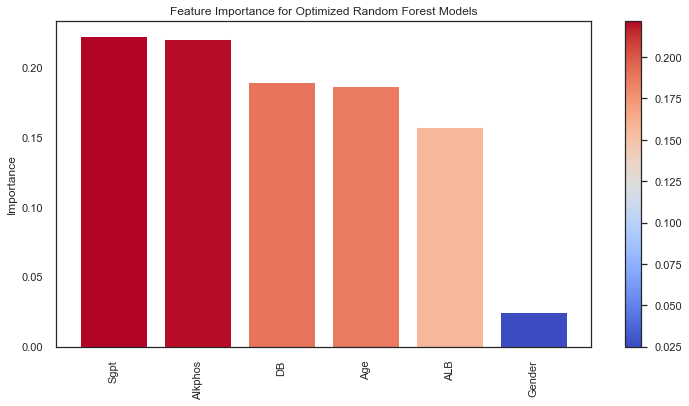

In [67]:
# FIGURE 17
# Get feature importances details
importances_optimized = rf_optimized.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance_Optimized': importances_optimized
})

importances_df.sort_values('Importance_Optimized', ascending=False, inplace=True)

cmap = plt.get_cmap('coolwarm')

norm = plt.Normalize(importances_df['Importance_Optimized'].min(), importances_df['Importance_Optimized'].max())

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.figure(figsize=(12,6))
plt.colorbar(sm)

plt.bar(importances_df['Feature'], importances_df['Importance_Optimized'], color=cmap(norm(importances_df['Importance_Optimized'].values)))
plt.xticks(rotation=90)
plt.title('Feature Importance for Optimized Random Forest Models')
plt.ylabel('Importance')
plt.show()

# ANN Deep Dive and Sensitivity 

Default:
Accuracy: 0.6404
Precision: 0.7661
Recall: 0.6404
F1 Score: 0.6553


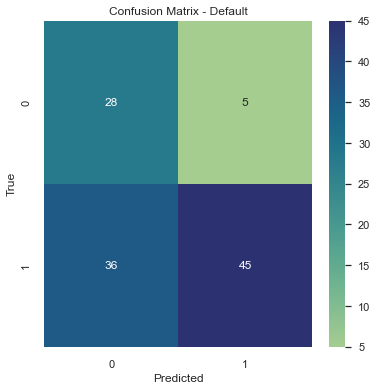

Optimized:
Accuracy: 0.6667
Precision: 0.7880
Recall: 0.6667
F1 Score: 0.6809


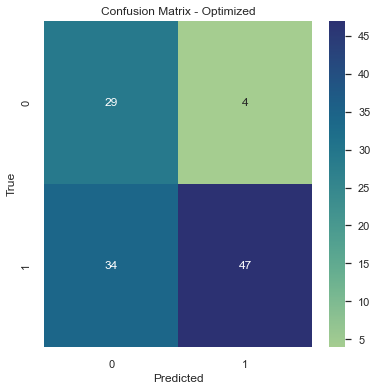

Adjusted hidden_layers:
Accuracy: 0.6754
Precision: 0.7692
Recall: 0.6754
F1 Score: 0.6904


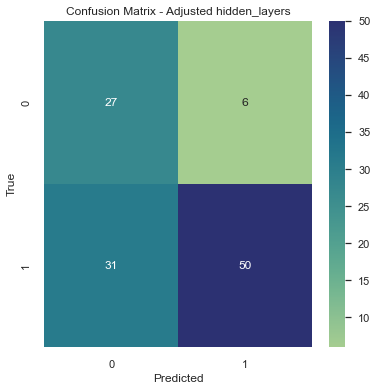

Adjusted learning_rate_init:
Accuracy: 0.7544
Precision: 0.7890
Recall: 0.7544
F1 Score: 0.7635


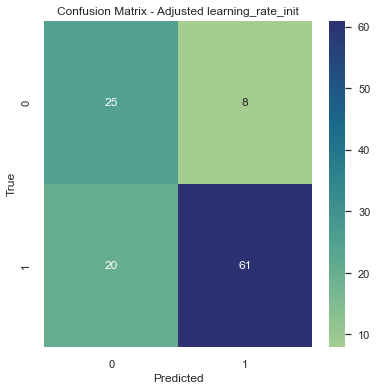

In [77]:
#FIGURES 18-21
classifiers = {
    "Default":  MLPClassifier(random_state=93, max_iter=2000),
    "Optimized": MLPClassifier(random_state=93, max_iter=2000, **best_params["ANN"]),
    "Adjusted hidden_layers": MLPClassifier(random_state=93, max_iter=2000, alpha=0.001, hidden_layer_sizes= (50,),
                                            activation='tanh', learning_rate_init=0.005),
    "Adjusted learning_rate_init": MLPClassifier(random_state=93, max_iter=2000, alpha=0.001, hidden_layer_sizes= (100,20), 
                                                 activation='tanh', learning_rate_init=0.01)
}

for name, classifier in classifiers.items():
    # Fit and predict
    classifier.fit(X_train_ros, y_train_ros)
    y_pred = classifier.predict(X_test)

    # Print metrics
    print(f'{name}:')
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    plot_confusion_matrix(y_test, y_pred, f'{name}')
    plt.show()

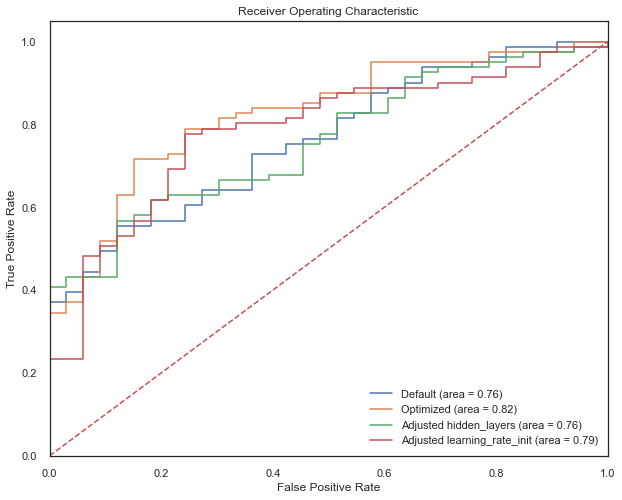

In [78]:
# FIGURE 22
#AUROC plot
plt.figure(figsize=(10, 8))

for name, classifier in classifiers.items():
    y_pred_proba = classifier.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()